In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Importing of data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

In [7]:
raw_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  FraudFound_P          15100 non-null

# Feature selection using f_classif and mutual_info_classif

In [9]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [10]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [11]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Age', 'Deductible']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']


C:\Users\hein_\AppData\Local\Temp\ipykernel_28168\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_28168\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_28168\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['VehiclePrice',
 'Sex',
 'DayOfWeek',
 'NumberOfSuppliments',
 'MonthClaimed',
 'PastNumberOfClaims',
 'Make',
 'AddressChange_Claim',
 'Fault',
 'VehicleCategory',
 'WeekOfMonthClaimed',
 'AgentType',
 'AccidentArea',
 'PoliceReportFiled',
 'AgeOfPolicyHolder',
 'BasePolicy',
 'Days_Policy_Claim',
 'AgeOfVehicle']

In [14]:
final_features = []

In [15]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [16]:
final_features

['Age',
 'Deductible',
 'VehiclePrice',
 'Sex',
 'DayOfWeek',
 'NumberOfSuppliments',
 'MonthClaimed',
 'PastNumberOfClaims',
 'Make',
 'AddressChange_Claim',
 'Fault',
 'VehicleCategory',
 'WeekOfMonthClaimed',
 'AgentType',
 'AccidentArea',
 'PoliceReportFiled',
 'AgeOfPolicyHolder',
 'BasePolicy',
 'Days_Policy_Claim',
 'AgeOfVehicle',
 'FraudFound_P']

# After looking at the data, we have narrowed down to the following features to be included in our final dataframe.

In [17]:
final_df = raw_data[final_features].copy()

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  15100 non-null  int64 
 1   Deductible           15100 non-null  int64 
 2   VehiclePrice         15100 non-null  object
 3   Sex                  15100 non-null  object
 4   DayOfWeek            15100 non-null  object
 5   NumberOfSuppliments  15100 non-null  object
 6   MonthClaimed         15100 non-null  object
 7   PastNumberOfClaims   15100 non-null  object
 8   Make                 15100 non-null  object
 9   AddressChange_Claim  15100 non-null  object
 10  Fault                15100 non-null  object
 11  VehicleCategory      15100 non-null  object
 12  WeekOfMonthClaimed   15100 non-null  object
 13  AgentType            15100 non-null  object
 14  AccidentArea         15100 non-null  object
 15  PoliceReportFiled    15100 non-null  object
 16  AgeO

### Binary Categorical Variables

In [19]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

Sex ['Female' 'Male']

Fault ['Policy Holder' 'Third Party']

AgentType ['External' 'Internal']

AccidentArea ['Urban' 'Rural']

PoliceReportFiled ['No' 'Yes']



### Multi-categorical Variables

In [20]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']

VehicleCategory ['Sport' 'Utility' 'Sedan']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65' '18 to 20']

BasePolicy ['Liability' 'Collision' 'All Perils']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

AgeOfVehicle ['3 year

## Ordinal Features
1) AgeOfPolicyHolder
2) PastNumberOfClaims
3) VehiclePrice
4) NumberOfSuppliments
5) Days_Policy_Claim

In [21]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

# Feature Engineering and Preprocessing

In [22]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [23]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [24]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [25]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [26]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [27]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [28]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [29]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['Sex', 'Fault', 'AgentType', 'AccidentArea', 'PoliceReportFiled']
Multi-Categorical Variable: ['DayOfWeek', 'AddressChange_Claim', 'VehicleCategory', 'WeekOfMonthClaimed', 'BasePolicy', 'AgeOfVehicle']
Numerical: ['Age', 'Deductible', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


# Encoding all the categorical variables using helper functions

## Label Encoding for Binary Features

In [30]:
convert_label(final_df, binary_lst)

,Age,Deductible,VehiclePrice,Sex,DayOfWeek,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,AddressChange_Claim,...,VehicleCategory,WeekOfMonthClaimed,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,BasePolicy,Days_Policy_Claim,AgeOfVehicle,FraudFound_P
0,21,300,more than 69000,0,Wednesday,none,Jan,none,Honda,1 year,...,Sport,1,0,1,0,26 to 30,Liability,more than 30,3 years,0
1,34,400,more than 69000,1,Wednesday,none,Jan,none,Honda,no change,...,Sport,4,0,1,1,31 to 35,Collision,more than 30,6 years,0
2,47,400,more than 69000,1,Friday,none,Nov,1,Honda,no change,...,Sport,2,0,1,0,41 to 50,Collision,more than 30,7 years,0
3,65,400,20000 to 29000,1,Saturday,more than 5,Jul,1,Toyota,no change,...,Sport,1,0,0,1,51 to 65,Liability,more than 30,more than 7,0
4,27,400,more than 69000,0,Monday,none,Feb,none,Honda,no change,...,Sport,2,0,1,0,31 to 35,Collision,more than 30,5 years,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,20000 to 29000,1,Friday,none,Nov,2 to 4,Toyota,no change,...,Sedan,5,0,1,0,31 to 35,Collision,more than 30,6 years,1
15096,30,400,30000 to 39000,1,Thursday,more than 5,Dec,more than 4,Pontiac,no change,...,Sport,1,0,1,0,31 to 35,Liability,more than 30,6 years,0
15097,24,400,20000 to 29000,1,Thursday,1 to 2,Dec,more than 4,Toyota,no change,...,Sedan,1,0,0,0,26 to 30,Collision,more than 30,5 years,1
15098,34,400,20000 to 29000,0,Monday,more than 5,Dec,none,Toyota,no change,...,Sedan,2,0,1,0,31 to 35,All Perils,more than 30,2 years,0


## One Hot Encoding

In [31]:
oneHotEncode(final_df,multicat_features)

,Age,Deductible,VehiclePrice,Sex,DayOfWeek,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,AddressChange_Claim,...,BasePolicy_Collision,BasePolicy_Liability,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,21,300,more than 69000,0,Wednesday,none,Jan,none,Honda,1 year,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,400,more than 69000,1,Wednesday,none,Jan,none,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,47,400,more than 69000,1,Friday,none,Nov,1,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,65,400,20000 to 29000,1,Saturday,more than 5,Jul,1,Toyota,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,400,more than 69000,0,Monday,none,Feb,none,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,20000 to 29000,1,Friday,none,Nov,2 to 4,Toyota,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,30,400,30000 to 39000,1,Thursday,more than 5,Dec,more than 4,Pontiac,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,24,400,20000 to 29000,1,Thursday,1 to 2,Dec,more than 4,Toyota,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,34,400,20000 to 29000,0,Monday,more than 5,Dec,none,Toyota,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling of Numberical Features

In [32]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Age,Deductible,VehiclePrice,Sex,DayOfWeek,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,AddressChange_Claim,...,BasePolicy_Collision,BasePolicy_Liability,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,more than 69000,0,Wednesday,none,Jan,none,Honda,1 year,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,more than 69000,1,Wednesday,none,Jan,none,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,more than 69000,1,Friday,none,Nov,1,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,20000 to 29000,1,Saturday,more than 5,Jul,1,Toyota,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,more than 69000,0,Monday,none,Feb,none,Honda,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,20000 to 29000,1,Friday,none,Nov,2 to 4,Toyota,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,0.218750,0.25,30000 to 39000,1,Thursday,more than 5,Dec,more than 4,Pontiac,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,0.125000,0.25,20000 to 29000,1,Thursday,1 to 2,Dec,more than 4,Toyota,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,0.281250,0.25,20000 to 29000,0,Monday,more than 5,Dec,none,Toyota,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label Encoding for Ordinal Features

In [33]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [34]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [35]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

## Frequency Encoding for Categorical Variables with more than 10 categories

In [36]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Age,Deductible,VehiclePrice,Sex,DayOfWeek,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,AddressChange_Claim,...,BasePolicy_Collision,BasePolicy_Liability,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,5,0,Wednesday,3,0.091060,3,0.164371,1 year,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,5,1,Wednesday,3,0.091060,3,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,5,1,Friday,3,0.084503,0,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,0,1,Saturday,2,0.080530,0,0.206689,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,5,0,Monday,3,0.082119,3,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,0,1,Friday,3,0.084503,1,0.206689,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,0.218750,0.25,1,1,Thursday,2,0.075430,2,0.254106,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,0.125000,0.25,0,1,Thursday,0,0.075430,2,0.206689,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,0.281250,0.25,0,0,Monday,2,0.075430,3,0.206689,no change,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   VehiclePrice                        15100 non-null  int32  
 3   Sex                                 15100 non-null  int32  
 4   DayOfWeek                           15100 non-null  object 
 5   NumberOfSuppliments                 15100 non-null  int32  
 6   MonthClaimed                        15100 non-null  float64
 7   PastNumberOfClaims                  15100 non-null  int32  
 8   Make                                15100 non-null  float64
 9   AddressChange_Claim                 15100 non-null  object 
 10  Fault                               15100 non-null  int32  
 11  VehicleCategory                     15100

In [38]:
final_df.head()

,Age,Deductible,VehiclePrice,Sex,DayOfWeek,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,AddressChange_Claim,...,BasePolicy_Collision,BasePolicy_Liability,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,5,0,Wednesday,3,0.091060,3,0.164371,1 year,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,5,1,Wednesday,3,0.091060,3,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,5,1,Friday,3,0.084503,0,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,0,1,Saturday,2,0.080530,0,0.206689,no change,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,5,0,Monday,3,0.082119,3,0.164371,no change,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Clean up the dataset to remove unnecessary columns

In [39]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [40]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   VehiclePrice                        15100 non-null  int32  
 3   Sex                                 15100 non-null  int32  
 4   NumberOfSuppliments                 15100 non-null  int32  
 5   MonthClaimed                        15100 non-null  float64
 6   PastNumberOfClaims                  15100 non-null  int32  
 7   Make                                15100 non-null  float64
 8   Fault                               15100 non-null  int32  
 9   AgentType                           15100 non-null  int32  
 10  AccidentArea                        15100 non-null  int32  
 11  PoliceReportFiled                   15100

In [42]:
final_df.head()

,Age,Deductible,VehiclePrice,Sex,NumberOfSuppliments,MonthClaimed,PastNumberOfClaims,Make,Fault,AgentType,...,BasePolicy_Collision,BasePolicy_Liability,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,5,0,3,0.091060,3,0.164371,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,5,1,3,0.091060,3,0.164371,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,5,1,3,0.084503,0,0.164371,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,0,1,2,0.080530,0,0.206689,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,5,0,3,0.082119,3,0.164371,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Train Test split

In [43]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.40, random_state=19, stratify=y)

In [47]:
X_train.shape

(8154, 45)

In [48]:
X_val.shape

(5436, 45)

In [49]:
X_test.shape

(1510, 45)

In [50]:
y_train['FraudFound_P'].sum()

482

# Machine Learning Model Training

In [51]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [52]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [53]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

# Training model without handling imbalance data

## Logistic Regression

In [54]:
LR = LogisticRegression(random_state=19)

In [55]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[5111    4]
 [ 320    1]]
TN: 5111, FP: 4, FN: 320, TP: 1


Precision:  0.2
Recall:  0.003115264797507788
F2:  0.0038789759503491074
G-Mean:  0.05579272907649341


## Linear SVC

In [56]:
svc = LinearSVC(random_state=19)

In [57]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[5114    1]
 [ 320    1]]
TN: 5114, FP: 1, FN: 320, TP: 1


Precision:  0.5
Recall:  0.003115264797507788
F2:  0.0038880248833592537
G-Mean:  0.055809100983456005


## XBG Classifier

In [58]:
xgb = XGBClassifier(random_state=19)

In [59]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[5064   51]
 [ 293   28]]
TN: 5064, FP: 51, FN: 293, TP: 28


Precision:  0.35443037974683544
Recall:  0.08722741433021806
F2:  0.10271460014673515
G-Mean:  0.29386680345967275


## Random Forest

In [60]:
rf = RandomForestClassifier(random_state=19)

In [61]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[5112    3]
 [ 316    5]]
TN: 5112, FP: 3, FN: 316, TP: 5


Precision:  0.625
Recall:  0.01557632398753894
F2:  0.01934984520123839
G-Mean:  0.12476853895772749


## AdaBoost

In [62]:
adb = AdaBoostClassifier(random_state=19)

In [63]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[5080   35]
 [ 317    4]]
TN: 5080, FP: 35, FN: 317, TP: 4


Precision:  0.10256410256410256
Recall:  0.012461059190031152
F2:  0.015117157974300828
G-Mean:  0.11124654107145666


## Voting Classifier

In [64]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [65]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[5114    1]
 [ 321    0]]
TN: 5114, FP: 1, FN: 321, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [66]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [67]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[5110    5]
 [ 316    5]]
TN: 5110, FP: 5, FN: 316, TP: 5


Precision:  0.5
Recall:  0.01557632398753894
F2:  0.019319938176197836
G-Mean:  0.12474412957884616


# Imbalance Data Handling

In [68]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [69]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [70]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [71]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [72]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [73]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [74]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [75]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[5083   32]
 [ 300   21]]
TN: 5083, FP: 32, FN: 300, TP: 21


Precision:  0.39622641509433965
Recall:  0.06542056074766354
F2:  0.07853403141361257
G-Mean:  0.25497310163477604

Sampling Size: 0.2

Confusion Matrix: 
 [[5066   49]
 [ 298   23]]
TN: 5066, FP: 49, FN: 298, TP: 23


Precision:  0.3194444444444444
Recall:  0.07165109034267912
F2:  0.08480825958702065
G-Mean:  0.2663919982110065

Sampling Size: 0.3

Confusion Matrix: 
 [[5070   45]
 [ 298   23]]
TN: 5070, FP: 45, FN: 298, TP: 23


Precision:  0.3382352941176471
Recall:  0.07165109034267912
F2:  0.08505917159763314
G-Mean:  0.26649714603361735

Sampling Size: 0.4

Confusion Matrix: 
 [[5078   37]
 [ 297   24]]
TN: 5078, FP: 37, FN: 297, TP: 24


Precision:  0.39344262295081966
Recall:  0.07476635514018691
F2:  0.08921933085501858
G-Mean:  0.2724436148007918

Sampling Size: 0.5

Confusion Matrix: 
 [[5062   53]
 [ 298   23]]
TN: 5062, FP: 53, FN: 298, TP: 23


Precision:  0.30263157894

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.396226,0.078534,0.065421,0.254973,0.1
1,0.319444,0.084808,0.071651,0.266392,0.2
2,0.338235,0.085059,0.071651,0.266497,0.3
3,0.393443,0.089219,0.074766,0.272444,0.4
4,0.302632,0.084559,0.071651,0.266287,0.5
5,0.416667,0.093006,0.077882,0.278116,0.6
6,0.412698,0.096511,0.080997,0.283568,0.7
7,0.396552,0.085693,0.071651,0.266760,0.8
8,0.418182,0.085885,0.071651,0.266839,0.9
9,0.342466,0.092115,0.077882,0.277760,1.0


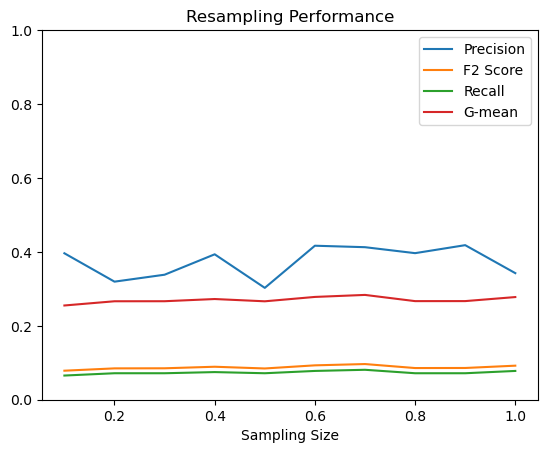

In [76]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[4811  304]
 [ 253   68]]
TN: 4811, FP: 304, FN: 253, TP: 68


Precision:  0.1827956989247312
Recall:  0.2118380062305296
F2:  0.20531400966183574
G-Mean:  0.4463718511691169

Sampling Size: 0.2

Confusion Matrix: 
 [[4675  440]
 [ 229   92]]
TN: 4675, FP: 440, FN: 229, TP: 92


Precision:  0.17293233082706766
Recall:  0.2866043613707165
F2:  0.2533039647577092
G-Mean:  0.5118107294285473

Sampling Size: 0.3

Confusion Matrix: 
 [[4622  493]
 [ 218  103]]
TN: 4622, FP: 493, FN: 218, TP: 103


Precision:  0.17281879194630873
Recall:  0.32087227414330216
F2:  0.27393617021276595
G-Mean:  0.5384659523459623

Sampling Size: 0.4

Confusion Matrix: 
 [[4606  509]
 [ 220  101]]
TN: 4606, FP: 509, FN: 220, TP: 101


Precision:  0.16557377049180327
Recall:  0.3146417445482866
F2:  0.2666314677930306
G-Mean:  0.5322887881003349

Sampling Size: 0.5

Confusion Matrix: 
 [[4588  527]
 [ 215  106]]
TN: 4588, FP: 527, FN: 215, TP: 106


Precision:  0.167456556

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.182796,0.205314,0.211838,0.446372,0.1
1,0.172932,0.253304,0.286604,0.511811,0.2
2,0.172819,0.273936,0.320872,0.538466,0.3
3,0.165574,0.266631,0.314642,0.532289,0.4
4,0.167457,0.276474,0.330218,0.544239,0.5
5,0.170181,0.290041,0.352025,0.560450,0.6
6,0.162328,0.273619,0.330218,0.543051,0.7
7,0.171091,0.295617,0.361371,0.567156,0.8


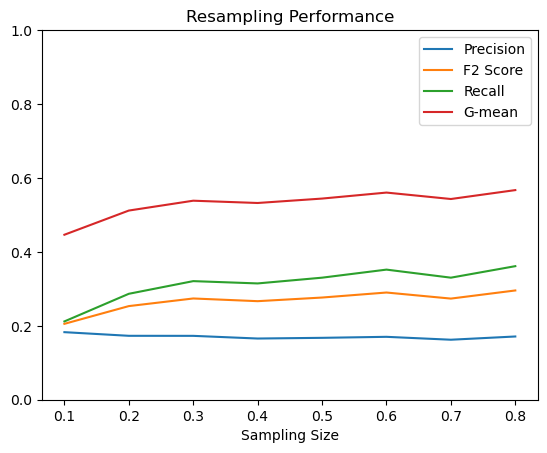

In [77]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[5064   51]
 [ 293   28]]
TN: 5064, FP: 51, FN: 293, TP: 28


Precision:  0.35443037974683544
Recall:  0.08722741433021806
F2:  0.10271460014673515
G-Mean:  0.29386680345967275

Sampling Size: 2

Confusion Matrix: 
 [[5007  108]
 [ 283   38]]
TN: 5007, FP: 108, FN: 283, TP: 38


Precision:  0.2602739726027397
Recall:  0.11838006230529595
F2:  0.13286713286713286
G-Mean:  0.34041231165775326

Sampling Size: 3

Confusion Matrix: 
 [[4957  158]
 [ 279   42]]
TN: 4957, FP: 158, FN: 279, TP: 42


Precision:  0.21
Recall:  0.1308411214953271
F2:  0.14150943396226415
G-Mean:  0.35608917333312823

Sampling Size: 4

Confusion Matrix: 
 [[4944  171]
 [ 273   48]]
TN: 4944, FP: 171, FN: 273, TP: 48


Precision:  0.2191780821917808
Recall:  0.14953271028037382
F2:  0.15968063872255486
G-Mean:  0.3801758402714888

Sampling Size: 5

Confusion Matrix: 
 [[4910  205]
 [ 270   51]]
TN: 4910, FP: 205, FN: 270, TP: 51


Precision:  0.19921875
Recall:  0.158878504672

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.354430,0.102715,0.087227,0.293867,1
1,0.260274,0.132867,0.118380,0.340412,2
2,0.210000,0.141509,0.130841,0.356089,3
3,0.219178,0.159681,0.149533,0.380176,4
4,0.199219,0.165584,0.158879,0.390526,5
5,0.189091,0.166774,0.161994,0.393613,6
6,0.189911,0.197409,0.199377,0.434437,7
7,0.176152,0.196612,0.202492,0.436414,8
8,0.177419,0.199275,0.205607,0.439667,9
9,0.168766,0.199286,0.208723,0.441879,10


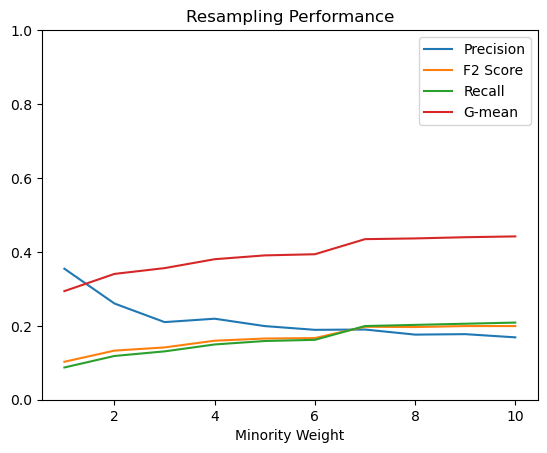

In [78]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[5098   17]
 [ 317    4]]
TN: 5098, FP: 17, FN: 317, TP: 4


Precision:  0.19047619047619047
Recall:  0.012461059190031152
F2:  0.015325670498084292
G-Mean:  0.111443457120863

Sampling Size: 0.2

Confusion Matrix: 
 [[4979  136]
 [ 293   28]]
TN: 4979, FP: 136, FN: 293, TP: 28


Precision:  0.17073170731707318
Recall:  0.08722741433021806
F2:  0.09668508287292818
G-Mean:  0.29139006718015004

Sampling Size: 0.3

Confusion Matrix: 
 [[4718  397]
 [ 237   84]]
TN: 4718, FP: 397, FN: 237, TP: 84


Precision:  0.17463617463617465
Recall:  0.2616822429906542
F2:  0.23796033994334276
G-Mean:  0.49129605411785116

Sampling Size: 0.4

Confusion Matrix: 
 [[4418  697]
 [ 191  130]]
TN: 4418, FP: 697, FN: 191, TP: 130


Precision:  0.15719467956469166
Recall:  0.40498442367601245
F2:  0.3079109426811938
G-Mean:  0.5914379620155632

Sampling Size: 0.5

Confusion Matrix: 
 [[4119  996]
 [ 163  158]]
TN: 4119, FP: 996, FN: 163, TP: 158


Precision:  0.13691

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.190476,0.015326,0.012461,0.111443,0.1
1,0.170732,0.096685,0.087227,0.291390,0.2
2,0.174636,0.237960,0.261682,0.491296,0.3
3,0.157195,0.307911,0.404984,0.591438,0.4
4,0.136915,0.324036,0.492212,0.629577,0.5
5,0.130592,0.338951,0.563863,0.656527,0.6
6,0.130189,0.360125,0.644860,0.685931,0.7
7,0.129892,0.375779,0.713396,0.706715,0.8
8,0.125263,0.373744,0.741433,0.707476,0.9
9,0.126189,0.384029,0.785047,0.719184,1.0


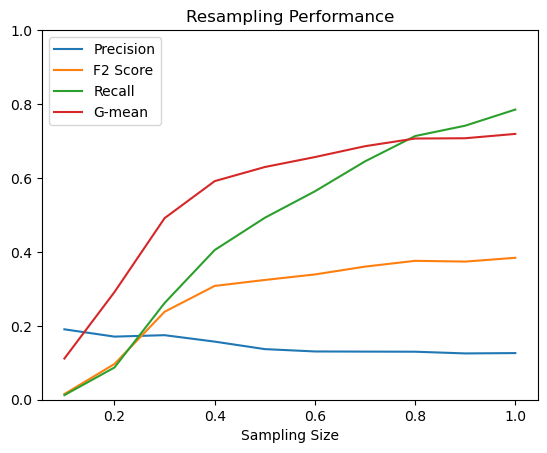

In [79]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[4880  235]
 [ 276   45]]
TN: 4880, FP: 235, FN: 276, TP: 45


Precision:  0.16071428571428573
Recall:  0.14018691588785046
F2:  0.14386189258312018
G-Mean:  0.36571336562025764

Sampling Size: 0.2

Confusion Matrix: 
 [[4149  966]
 [ 150  171]]
TN: 4149, FP: 966, FN: 150, TP: 171


Precision:  0.1503957783641161
Recall:  0.5327102803738317
F2:  0.3531598513011152
G-Mean:  0.6573466248447062

Sampling Size: 0.3

Confusion Matrix: 
 [[3646 1469]
 [ 104  217]]
TN: 3646, FP: 1469, FN: 104, TP: 217


Precision:  0.12870699881376038
Recall:  0.67601246105919
F2:  0.3653198653198653
G-Mean:  0.6941652417111953

Sampling Size: 0.4

Confusion Matrix: 
 [[3395 1720]
 [  70  251]]
TN: 3395, FP: 1720, FN: 70, TP: 251


Precision:  0.12734652460679857
Recall:  0.7819314641744548
F2:  0.38556067588325654
G-Mean:  0.7204127904443609

Sampling Size: 0.5

Confusion Matrix: 
 [[3256 1859]
 [  52  269]]
TN: 3256, FP: 1859, FN: 52, TP: 269


Precision:  0.12640977

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.160714,0.143862,0.140187,0.365713,0.1
1,0.150396,0.353160,0.532710,0.657347,0.2
2,0.128707,0.365320,0.676012,0.694165,0.3
3,0.127347,0.385561,0.781931,0.720413,0.4
4,0.126410,0.394197,0.838006,0.730370,0.5
5,0.123989,0.393162,0.859813,0.729401,0.6
6,0.123043,0.394810,0.881620,0.730733,0.7
7,0.123182,0.397570,0.897196,0.733223,0.8


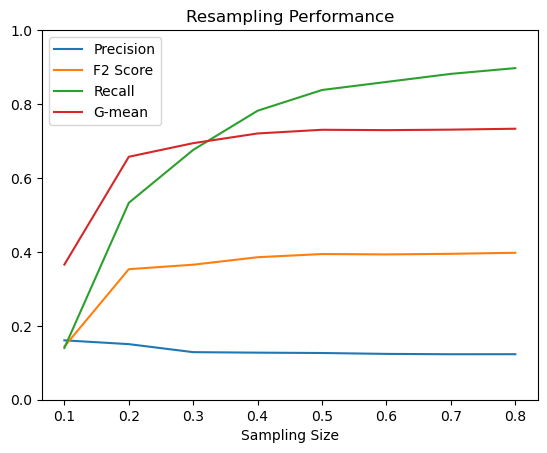

In [80]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[5111    4]
 [ 320    1]]
TN: 5111, FP: 4, FN: 320, TP: 1


Precision:  0.2
Recall:  0.003115264797507788
F2:  0.0038789759503491074
G-Mean:  0.05579272907649341

Sampling Size: 2

Confusion Matrix: 
 [[5076   39]
 [ 313    8]]
TN: 5076, FP: 39, FN: 313, TP: 8


Precision:  0.1702127659574468
Recall:  0.024922118380062305
F2:  0.03005259203606311
G-Mean:  0.1572644154381029

Sampling Size: 3

Confusion Matrix: 
 [[5037   78]
 [ 308   13]]
TN: 5037, FP: 78, FN: 308, TP: 13


Precision:  0.14285714285714285
Recall:  0.040498442367601244
F2:  0.047272727272727265
G-Mean:  0.19970195495396503

Sampling Size: 4

Confusion Matrix: 
 [[4909  206]
 [ 281   40]]
TN: 4909, FP: 206, FN: 281, TP: 40


Precision:  0.16260162601626016
Recall:  0.12461059190031153
F2:  0.13071895424836602
G-Mean:  0.345820852043991

Sampling Size: 5

Confusion Matrix: 
 [[4737  378]
 [ 249   72]]
TN: 4737, FP: 378, FN: 249, TP: 72


Precision:  0.16
Recall:  0.22429906542056074


,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.200000,0.003879,0.003115,0.055793,1
1,0.170213,0.030053,0.024922,0.157264,2
2,0.142857,0.047273,0.040498,0.199702,3
3,0.162602,0.130719,0.124611,0.345821,4
4,0.160000,0.207612,0.224299,0.455767,5
5,0.161290,0.287932,0.358255,0.562469,6
6,0.149582,0.319196,0.445483,0.612108,7
7,0.146721,0.357428,0.557632,0.666441,8
8,0.138001,0.368421,0.632399,0.689658,9
9,0.134958,0.382670,0.707165,0.711341,10


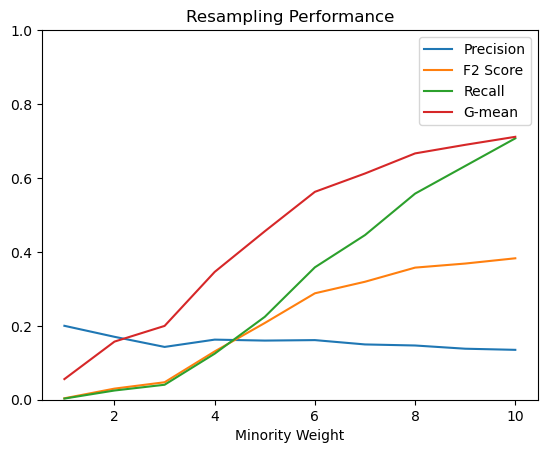

In [81]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [82]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[3033 2082]
 [  27  294]]
TN: 3033, FP: 2082, FN: 27, TP: 294


Precision:  0.12373737373737374
Recall:  0.9158878504672897
F2:  0.4016393442622951
G-Mean:  0.7369440811767769


### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[5114    1]
 [ 320    1]]
TN: 5114, FP: 1, FN: 320, TP: 1


Precision:  0.5
Recall:  0.003115264797507788
F2:  0.0038880248833592537
G-Mean:  0.055809100983456005

Sampling Size: 0.2

Confusion Matrix: 
 [[5025   90]
 [ 302   19]]
TN: 5025, FP: 90, FN: 302, TP: 19


Precision:  0.1743119266055046
Recall:  0.059190031152647975
F2:  0.0681981335247667
G-Mean:  0.24114013421421104

Sampling Size: 0.3

Confusion Matrix: 
 [[4733  382]
 [ 243   78]]
TN: 4733, FP: 382, FN: 243, TP: 78


Precision:  0.16956521739130434
Recall:  0.24299065420560748
F2:  0.22362385321100917
G-Mean:  0.47417670923884764

Sampling Size: 0.4

Confusion Matrix: 
 [[4425  690]
 [ 194  127]]
TN: 4425, FP: 690, FN: 194, TP: 127


Precision:  0.1554467564259486
Recall:  0.3956386292834891
F2:  0.30223702998572105
G-Mean:  0.5850367701270344

Sampling Size: 0.5

Confusion Matrix: 
 [[4086 1029]
 [ 158  163]]
TN: 4086, FP: 1029, FN: 158, TP: 163


Precision:  0.13674496644295303
R

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.500000,0.003888,0.003115,0.055809,0.1
1,0.174312,0.068198,0.059190,0.241140,0.2
2,0.169565,0.223624,0.242991,0.474177,0.3
3,0.155447,0.302237,0.395639,0.585037,0.4
4,0.136745,0.329160,0.507788,0.636895,0.5
5,0.132547,0.350459,0.595016,0.670527,0.6
6,0.130695,0.369241,0.679128,0.697573,0.7
7,0.127787,0.376241,0.732087,0.708882,0.8
8,0.124625,0.379342,0.775701,0.714466,0.9
9,0.124464,0.385980,0.813084,0.721964,1.0


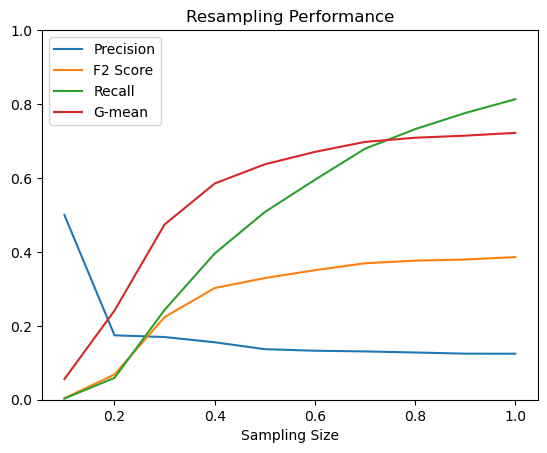

In [83]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[4962  153]
 [ 295   26]]
TN: 4962, FP: 153, FN: 295, TP: 26


Precision:  0.1452513966480447
Recall:  0.08099688473520249
F2:  0.08885850991114147
G-Mean:  0.2803107276198735

Sampling Size: 0.2

Confusion Matrix: 
 [[4168  947]
 [ 152  169]]
TN: 4168, FP: 947, FN: 152, TP: 169


Precision:  0.15143369175627241
Recall:  0.5264797507788161
F2:  0.3520833333333333
G-Mean:  0.6549857812618168

Sampling Size: 0.3

Confusion Matrix: 
 [[3585 1530]
 [  91  230]]
TN: 3585, FP: 1530, FN: 91, TP: 230


Precision:  0.13068181818181818
Recall:  0.7165109034267912
F2:  0.3777923784494086
G-Mean:  0.7086522376295512

Sampling Size: 0.4

Confusion Matrix: 
 [[3296 1819]
 [  59  262]]
TN: 3296, FP: 1819, FN: 59, TP: 262


Precision:  0.12590100913022587
Recall:  0.8161993769470405
F2:  0.3893016344725111
G-Mean:  0.7252185629925523

Sampling Size: 0.5

Confusion Matrix: 
 [[3143 1972]
 [  44  277]]
TN: 3143, FP: 1972, FN: 44, TP: 277


Precision:  0.123165851

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.145251,0.088859,0.080997,0.280311,0.1
1,0.151434,0.352083,0.526480,0.654986,0.2
2,0.130682,0.377792,0.716511,0.708652,0.3
3,0.125901,0.389302,0.816199,0.725219,0.4
4,0.123166,0.392018,0.862928,0.728177,0.5
5,0.123011,0.396232,0.890966,0.731983,0.6
6,0.122570,0.397260,0.903427,0.732637,0.7
7,0.123539,0.402174,0.922118,0.737249,0.8


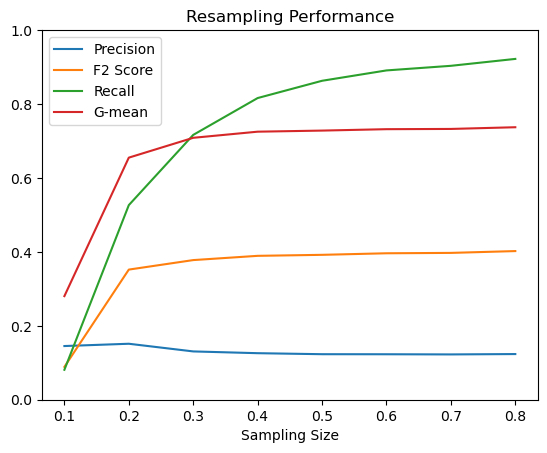

In [84]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[5114    1]
 [ 320    1]]
TN: 5114, FP: 1, FN: 320, TP: 1


Precision:  0.5
Recall:  0.003115264797507788
F2:  0.0038880248833592537
G-Mean:  0.055809100983456005

Sampling Size: 2

Confusion Matrix: 
 [[5108    7]
 [ 318    3]]
TN: 5108, FP: 7, FN: 318, TP: 3


Precision:  0.3
Recall:  0.009345794392523364
F2:  0.011591962905718702
G-Mean:  0.09660747615517744

Sampling Size: 3

Confusion Matrix: 
 [[5070   45]
 [ 312    9]]
TN: 5070, FP: 45, FN: 312, TP: 9


Precision:  0.16666666666666666
Recall:  0.028037383177570093
F2:  0.033632286995515695
G-Mean:  0.1667054887592472

Sampling Size: 4

Confusion Matrix: 
 [[5012  103]
 [ 304   17]]
TN: 5012, FP: 103, FN: 304, TP: 17


Precision:  0.14166666666666666
Recall:  0.0529595015576324
F2:  0.06054131054131053
G-Mean:  0.22780049142145853

Sampling Size: 5

Confusion Matrix: 
 [[4886  229]
 [ 275   46]]
TN: 4886, FP: 229, FN: 275, TP: 46


Precision:  0.16727272727272727
Recall:  0.14330218068535824

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.003888,0.003115,0.055809,1
1,0.300000,0.011592,0.009346,0.096607,2
2,0.166667,0.033632,0.028037,0.166705,3
3,0.141667,0.060541,0.052960,0.227800,4
4,0.167273,0.147530,0.143302,0.369982,5
5,0.169675,0.255713,0.292835,0.516236,6
6,0.163613,0.305176,0.389408,0.583747,7
7,0.157158,0.329869,0.454829,0.620648,8
8,0.151824,0.363378,0.557632,0.669786,9
9,0.150309,0.351967,0.529595,0.655817,10


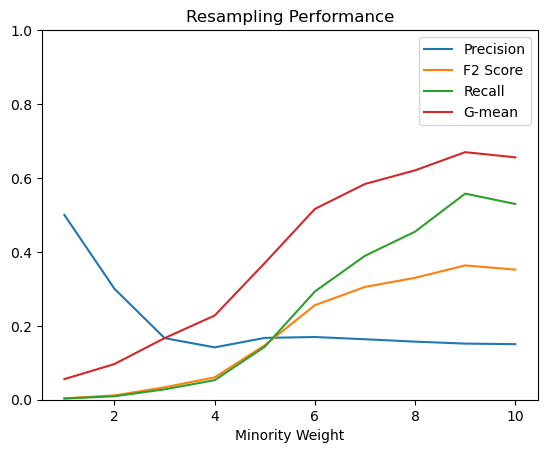

In [85]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [86]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[3066 2049]
 [  29  292]]
TN: 3066, FP: 2049, FN: 29, TP: 292


Precision:  0.12473302007689022
Recall:  0.9096573208722741
F2:  0.4027586206896552
G-Mean:  0.738417814768857


## Random Forest

Sampling Size: 0.1

Confusion Matrix: 
 [[5109    6]
 [ 311   10]]
TN: 5109, FP: 6, FN: 311, TP: 10


Precision:  0.625
Recall:  0.03115264797507788
F2:  0.038461538461538464
G-Mean:  0.17639757730622588

Sampling Size: 0.2

Confusion Matrix: 
 [[5098   17]
 [ 308   13]]
TN: 5098, FP: 17, FN: 308, TP: 13


Precision:  0.43333333333333335
Recall:  0.040498442367601244
F2:  0.04946727549467276
G-Mean:  0.20090754948212194

Sampling Size: 0.3

Confusion Matrix: 
 [[5097   18]
 [ 310   11]]
TN: 5097, FP: 18, FN: 310, TP: 11


Precision:  0.3793103448275862
Recall:  0.03426791277258567
F2:  0.041888804265041886
G-Mean:  0.1847899398701084

Sampling Size: 0.4

Confusion Matrix: 
 [[5091   24]
 [ 308   13]]
TN: 5091, FP: 24, FN: 308, TP: 13


Precision:  0.35135135135135137
Recall:  0.040498442367601244
F2:  0.04920514761544284
G-Mean:  0.20076957028052625

Sampling Size: 0.5

Confusion Matrix: 
 [[5088   27]
 [ 312    9]]
TN: 5088, FP: 27, FN: 312, TP: 9


Precision:  0.25
Recall:  0.0280373

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.625000,0.038462,0.031153,0.176398,0.1
1,0.433333,0.049467,0.040498,0.200908,0.2
2,0.379310,0.041889,0.034268,0.184790,0.3
3,0.351351,0.049205,0.040498,0.200770,0.4
4,0.250000,0.034091,0.028037,0.167001,0.5
5,0.333333,0.063670,0.052960,0.229363,0.6
6,0.288889,0.048909,0.040498,0.200612,0.7
7,0.327273,0.067214,0.056075,0.235943,0.8
8,0.309091,0.063480,0.052960,0.229273,0.9
9,0.274510,0.052434,0.043614,0.208082,1.0


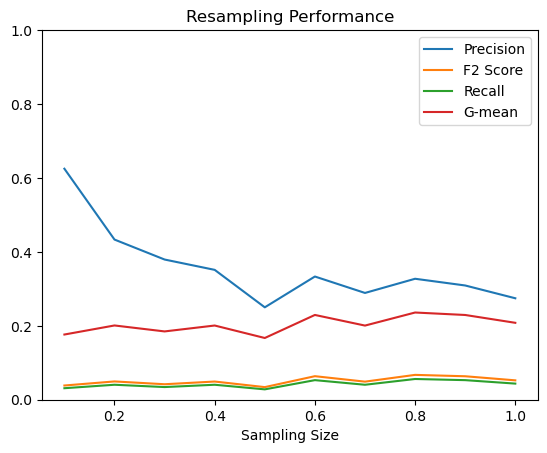

In [87]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[4986  129]
 [ 286   35]]
TN: 4986, FP: 129, FN: 286, TP: 35


Precision:  0.21341463414634146
Recall:  0.10903426791277258
F2:  0.12085635359116022
G-Mean:  0.32601292930033343

Sampling Size: 0.2

Confusion Matrix: 
 [[4806  309]
 [ 249   72]]
TN: 4806, FP: 309, FN: 249, TP: 72


Precision:  0.1889763779527559
Recall:  0.22429906542056074
F2:  0.2162162162162162
G-Mean:  0.4590741050228011

Sampling Size: 0.3

Confusion Matrix: 
 [[4741  374]
 [ 238   83]]
TN: 4741, FP: 374, FN: 238, TP: 83


Precision:  0.18161925601750548
Recall:  0.2585669781931464
F2:  0.23836875358989085
G-Mean:  0.489551841579702

Sampling Size: 0.4

Confusion Matrix: 
 [[4695  420]
 [ 241   80]]
TN: 4695, FP: 420, FN: 241, TP: 80


Precision:  0.16
Recall:  0.24922118380062305
F2:  0.2242152466367713
G-Mean:  0.4782857663367553

Sampling Size: 0.5

Confusion Matrix: 
 [[4672  443]
 [ 236   85]]
TN: 4672, FP: 443, FN: 236, TP: 85


Precision:  0.16098484848484848
Recall:

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.213415,0.120856,0.109034,0.326013,0.1
1,0.188976,0.216216,0.224299,0.459074,0.2
2,0.181619,0.238369,0.258567,0.489552,0.3
3,0.160000,0.224215,0.249221,0.478286,0.4
4,0.160985,0.234547,0.264798,0.491797,0.5
5,0.171096,0.273065,0.320872,0.538116,0.6
6,0.152276,0.252473,0.302181,0.519884,0.7
7,0.149920,0.245945,0.292835,0.512172,0.8


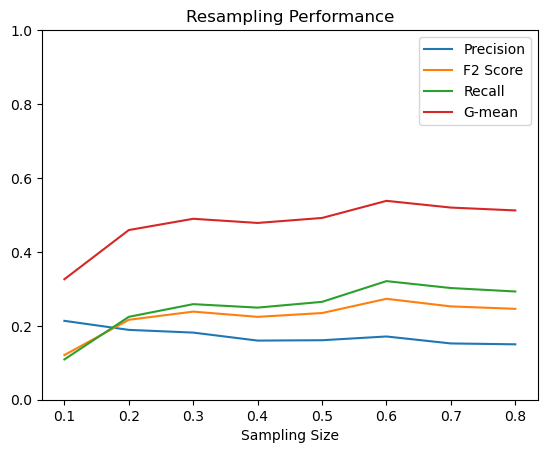

In [88]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[5112    3]
 [ 316    5]]
TN: 5112, FP: 3, FN: 316, TP: 5


Precision:  0.625
Recall:  0.01557632398753894
F2:  0.01934984520123839
G-Mean:  0.12476853895772749

Sampling Size: 2

Confusion Matrix: 
 [[5114    1]
 [ 313    8]]
TN: 5114, FP: 1, FN: 313, TP: 8


Precision:  0.8888888888888888
Recall:  0.024922118380062305
F2:  0.030935808197989176
G-Mean:  0.1578519750293062

Sampling Size: 3

Confusion Matrix: 
 [[5112    3]
 [ 316    5]]
TN: 5112, FP: 3, FN: 316, TP: 5


Precision:  0.625
Recall:  0.01557632398753894
F2:  0.01934984520123839
G-Mean:  0.12476853895772749

Sampling Size: 4

Confusion Matrix: 
 [[5113    2]
 [ 314    7]]
TN: 5113, FP: 2, FN: 314, TP: 7


Precision:  0.7777777777777778
Recall:  0.021806853582554516
F2:  0.027068832173240524
G-Mean:  0.14764256484356983

Sampling Size: 5

Confusion Matrix: 
 [[5113    2]
 [ 315    6]]
TN: 5113, FP: 2, FN: 315, TP: 6


Precision:  0.75
Recall:  0.018691588785046728
F2:  0.02321981424148

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.625000,0.019350,0.015576,0.124769,1
1,0.888889,0.030936,0.024922,0.157852,2
2,0.625000,0.019350,0.015576,0.124769,3
3,0.777778,0.027069,0.021807,0.147643,4
4,0.750000,0.023220,0.018692,0.136690,5
5,0.857143,0.023238,0.018692,0.136704,6
6,0.857143,0.023238,0.018692,0.136704,7
7,0.875000,0.027090,0.021807,0.147657,8
8,0.750000,0.023220,0.018692,0.136690,9
9,0.857143,0.023238,0.018692,0.136704,10


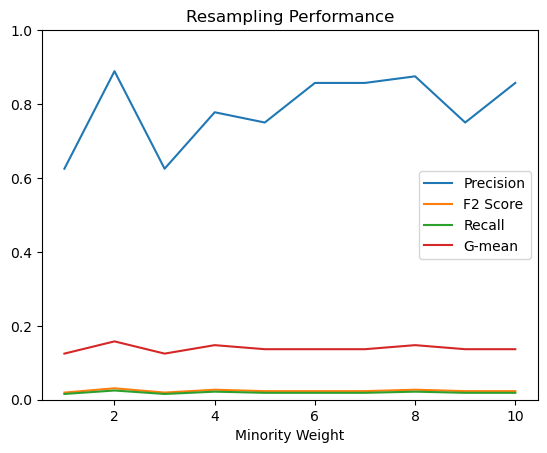

In [89]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, RandomForestClassifier)

In [90]:
newrf = RandomForestClassifier(class_weight="balanced", random_state=19)
newrf.fit(X_train, y_train)
y_pred = newrf.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[5112    3]
 [ 316    5]]
TN: 5112, FP: 3, FN: 316, TP: 5


Precision:  0.625
Recall:  0.01557632398753894
F2:  0.01934984520123839
G-Mean:  0.12476853895772749


## AdaBoost Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[5072   43]
 [ 316    5]]
TN: 5072, FP: 43, FN: 316, TP: 5


Precision:  0.10416666666666667
Recall:  0.01557632398753894
F2:  0.018768768768768766
G-Mean:  0.12427944048959252

Sampling Size: 0.2

Confusion Matrix: 
 [[5051   64]
 [ 314    7]]
TN: 5051, FP: 64, FN: 314, TP: 7


Precision:  0.09859154929577464
Recall:  0.021806853582554516
F2:  0.025830258302583023
G-Mean:  0.14674468118339884

Sampling Size: 0.3

Confusion Matrix: 
 [[5012  103]
 [ 306   15]]
TN: 5012, FP: 103, FN: 306, TP: 15


Precision:  0.1271186440677966
Recall:  0.04672897196261682
F2:  0.05349500713266761
G-Mean:  0.2139813018738773

Sampling Size: 0.4

Confusion Matrix: 
 [[4917  198]
 [ 278   43]]
TN: 4917, FP: 198, FN: 278, TP: 43


Precision:  0.17842323651452283
Recall:  0.13395638629283488
F2:  0.14098360655737704
G-Mean:  0.3588467330089223

Sampling Size: 0.5

Confusion Matrix: 
 [[4980  135]
 [ 296   25]]
TN: 4980, FP: 135, FN: 296, TP: 25


Precision:  0.15625


,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.104167,0.018769,0.015576,0.124279,0.1
1,0.098592,0.025830,0.021807,0.146745,0.2
2,0.127119,0.053495,0.046729,0.213981,0.3
3,0.178423,0.140984,0.133956,0.358847,0.4
4,0.156250,0.086565,0.077882,0.275365,0.5
5,0.167832,0.152866,0.149533,0.377591,0.6
6,0.164706,0.172414,0.174455,0.405917,0.7
7,0.141566,0.145421,0.146417,0.371832,0.8
8,0.147253,0.192639,0.208723,0.439192,0.9
9,0.131528,0.188784,0.211838,0.439594,1.0


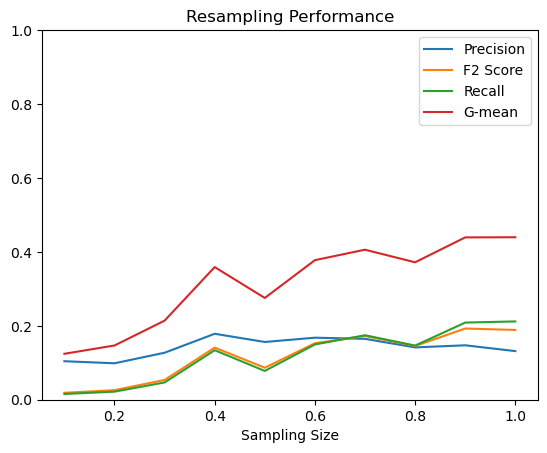

In [91]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[4951  164]
 [ 294   27]]
TN: 4951, FP: 164, FN: 294, TP: 27


Precision:  0.14136125654450263
Recall:  0.08411214953271028
F2:  0.09152542372881356
G-Mean:  0.2853336618758838

Sampling Size: 0.2

Confusion Matrix: 
 [[4563  552]
 [ 228   93]]
TN: 4563, FP: 552, FN: 228, TP: 93


Precision:  0.14418604651162792
Recall:  0.2897196261682243
F2:  0.24105754276827374
G-Mean:  0.5083834142031715

Sampling Size: 0.3

Confusion Matrix: 
 [[4418  697]
 [ 207  114]]
TN: 4418, FP: 697, FN: 207, TP: 114


Precision:  0.1405672009864365
Recall:  0.35514018691588783
F2:  0.2720763723150358
G-Mean:  0.5538471767283546

Sampling Size: 0.4

Confusion Matrix: 
 [[4237  878]
 [ 173  148]]
TN: 4237, FP: 878, FN: 173, TP: 148


Precision:  0.1442495126705653
Recall:  0.46105919003115264
F2:  0.3203463203463203
G-Mean:  0.6179947055931404

Sampling Size: 0.5

Confusion Matrix: 
 [[4021 1094]
 [ 145  176]]
TN: 4021, FP: 1094, FN: 145, TP: 176


Precision:  0.1385826

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.141361,0.091525,0.084112,0.285334,0.1
1,0.144186,0.241058,0.289720,0.508383,0.2
2,0.140567,0.272076,0.355140,0.553847,0.3
3,0.144250,0.320346,0.461059,0.617995,0.4
4,0.138583,0.344558,0.548287,0.656520,0.5
5,0.132386,0.337657,0.551402,0.652957,0.6
6,0.131263,0.344317,0.579439,0.663316,0.7
7,0.128446,0.355903,0.638629,0.681878,0.8


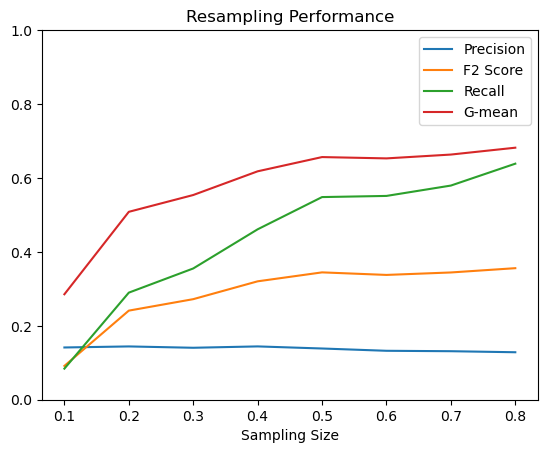

In [92]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

##  Using Class Weighing on Voting Classifier

In [93]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [94]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class)

Confusion Matrix: 
 [[3080 2035]
 [  34  287]]
TN: 3080, FP: 2035, FN: 34, TP: 287


Precision:  0.12360034453057708
Recall:  0.8940809968847352
F2:  0.39794786466999454
G-Mean:  0.7337379320730606


(0.12360034453057708,
 0.8940809968847352,
 0.39794786466999454,
 0.7337379320730606)

In [95]:
vc_class_2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [96]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_2)

Confusion Matrix: 
 [[3673 1442]
 [  89  232]]
TN: 3673, FP: 1442, FN: 89, TP: 232


Precision:  0.13859020310633213
Recall:  0.7227414330218068
F2:  0.3921568627450981
G-Mean:  0.7204089860846372


(0.13859020310633213,
 0.7227414330218068,
 0.3921568627450981,
 0.7204089860846372)

In [97]:
vc_class_3 = VotingClassifier(
    estimators=[('XGB',XGBClassifier(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [98]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_3)

Confusion Matrix: 
 [[4442  673]
 [ 205  116]]
TN: 4442, FP: 673, FN: 205, TP: 116


Precision:  0.14702154626108999
Recall:  0.3613707165109034
F2:  0.2797877472262421
G-Mean:  0.5601997833027083


(0.14702154626108999,
 0.3613707165109034,
 0.2797877472262421,
 0.5601997833027083)

# Hyper parameter tuning for XGB

In [99]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [100]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [101]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [102]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [103]:
load = True #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

In [104]:
XGB_hyperopt[1]

{'booster': 0,
 'colsample_bylevel': 0.19151572699658645,
 'colsample_bynode': 0.6329283822987078,
 'colsample_bytree': 0.3865791309646543,
 'gamma': 16.60120812043403,
 'learning_rate': 0.1866255601330448,
 'max_depth': 8.0,
 'min_child_weight': 1.749492711643751,
 'n_estimators': 540.0,
 'reg_alpha': 0.08277604446149361,
 'reg_lambda': 4.451367764866161,
 'scale_pos_weight': 7.919235255732057,
 'subsample': 0.2076764026764466}

In [105]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [106]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
90,-0.409658,[0],[0.19151572699658645],[0.6329283822987078],[0.3865791309646543],[16.60120812043403],[0.1866255601330448],[8.0],[1.749492711643751],[540.0],[0.08277604446149361],[4.451367764866161],[7.919235255732057],[0.2076764026764466]
93,-0.409471,[0],[0.22494925286321146],[0.7998908338400603],[0.4419487324977333],[18.17861591290695],[0.2396906973553982],[6.0],[1.9647438437649858],[480.0],[0.08672409792698169],[5.367882913066752],[5.136981614174474],[0.15301475420936214]
80,-0.406758,[1],[0.24820165646923426],[0.6976895049491914],[0.37634183049919484],[6.086361603124004],[0.1635963493997701],[8.0],[1.7614214422417103],[360.0],[0.0917472132546593],[5.009072631144652],[7.912016181041552],[0.363495327553889]
31,-0.406699,[0],[0.37820072856019105],[0.4234785140235286],[0.2861548752067796],[3.120912105721594],[0.14643261185206102],[20.0],[1.6187680470422117],[280.0],[0.088426110696496],[1.788656068447556],[4.37356914836289],[0.26570664736101146]
57,-0.406351,[1],[0.3010509344095089],[0.5196034479251982],[0.20184563344422413],[11.226228856462573],[0.14693548660536573],[13.0],[1.5842318126186468],[180.0],[0.05727313343734695],[4.9927953639932205],[8.47534891508078],[0.3543100244504304]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,-0.314685,[0],[0.27361042727782703],[0.5970071961052026],[0.5032384428462213],[8.878296073349254],[0.377369975401263],[8.0],[1.6522746236418113],[380.0],[0.06146049195876007],[2.2586232331479534],[2.9619205124506593],[0.4714336548674028]
60,-0.309675,[1],[0.3495939681791183],[0.1440202052520897],[0.32656458074817635],[15.16710443603097],[0.11030422688114279],[2.0],[1.6599979491915686],[80.0],[0.047929222199682375],[5.766070407865156],[1.009913770695424],[0.3541854755011202]
87,-0.309320,[1],[0.20795329564482362],[0.28496955822207504],[0.33715715759060333],[5.666177337523772],[0.05020764285327747],[4.0],[1.6195817142081859],[80.0],[0.07670341359275183],[3.904267344745553],[1.9710664680057985],[0.2932248158868228]
15,-0.284043,[0],[0.2861178614592421],[0.17674891740181597],[0.6037906143926959],[8.72532339401416],[0.2323726087685452],[14.0],[1.9140536670191193],[320.0],[0.09663500287155227],[3.160478490901445],[1.0834513406053539],[0.4528979846592037]


In [107]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [108]:
xgboost_model_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.19151572699658645,
              colsample_bynode=0.6329283822987078,
              colsample_bytree=0.3865791309646543, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=16.60120812043403, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1866255601330448, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1.749492711643751, missing=nan,
              monotone_constraints=None, n_estimators=540, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

## Second Round of Tuning for XGB

In [109]:
# parameters = xg_chosen.keys()

In [110]:
# sorted_results = bayesTrialsData.sort_values('loss')
# sorted_results

In [111]:
# sorted_results.reset_index(inplace=True)

In [112]:
# sorted_results

In [113]:
# sorted_results.drop('index',axis=1,inplace=True)

In [114]:
# top_10 = sorted_results.iloc[0:10]
# top_10

In [115]:
# for i in parameters:
#     minimum = top_10[i].min()
#     maximum = top_10[i].max()
#     print(i,'Min:',minimum,'Max:',maximum)

In [116]:
# # XGB Bayesian hyperopt2

# num_eval_2 = 100


# XGB_param_hyperopt2 = {
#     'booster': hp.choice('booster', ['gbtree']),
#     'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
#     'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
#     'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
#     'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
#     'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
#     'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
#     'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
#     'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
#     'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
#     'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
#     'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
#     'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
# }

# if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

# def save_file(path, data):
#     output = open(path, 'wb')
#     pickle.dump(data, output)
#     output.close()

# def load_file(path):
#     pkl_file = open(path, 'rb')
#     data = pickle.load(pkl_file)
#     pkl_file.close()
#     return data

In [117]:
# load = False
# if(load == False):
#     XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
#     save_file('TuningFS/XGB_hyperopt2.pkl', XGB_hyperopt2)
# else:
#     try:
#         XGB_hyperopt2 = load_file('TuningFS/XGB_hyperopt2.pkl')
#     except Exception as e:
#         print(e)

In [118]:
# xg_chosen2 = XGB_hyperopt2[1]
# xg_chosen2

In [119]:
# trials = XGB_hyperopt2[0].trials
# import json

# record = []
# losses = []
# for trial in trials:
#     loss = trial["result"]["loss"]
#     values = trial["misc"]['vals']
#     #print(loss,values)
#     losses.append(loss)
#     record.append(values)

# bayesTrialsData2 = pd.DataFrame(record)

# #if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# # I left the values as list.

# bayesTrialsData2.insert(0, 'loss', losses)

In [120]:
# bayesTrialsData2.sort_values(by='loss')

In [121]:
# xg_chosen2 = XGB_hyperopt2[1]

# xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']],
#                                   colsample_bytree=xg_chosen2['colsample_bytree'],
#                                   colsample_bynode = xg_chosen2['colsample_bynode'],
#                                   colsample_bylevel = xg_chosen2['colsample_bylevel'],
#                                   n_estimators = int(xg_chosen2['n_estimators']),
#                                   reg_alpha = xg_chosen2['reg_alpha'],
#                                   reg_lambda = xg_chosen2['reg_lambda'],
#                                   max_depth=int(xg_chosen2['max_depth']),
#                                   subsample = xg_chosen2['subsample'],
#                                   gamma = xg_chosen2['gamma'],
#                                   min_child_weight = xg_chosen2['min_child_weight'],
#                                   scale_pos_weight = xg_chosen2['scale_pos_weight'],
#                                   learning_rate=xg_chosen2['learning_rate'],
#                                   random_state=19)

In [122]:
# xgboost_model_2.get_xgb_params()

In [123]:
# xgboost_model_2

### Model without tuning

In [124]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1407   14]
 [  84    5]]
TN: 1407, FP: 14, FN: 84, TP: 5


Precision:  0.2631578947368421
Recall:  0.056179775280898875
F2:  0.06666666666666667
G-Mean:  0.23585224179119935


### Model without tuning but with imbalance handling

In [125]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1278  143]
 [  54   35]]
TN: 1278, FP: 143, FN: 54, TP: 35


Precision:  0.19662921348314608
Recall:  0.39325842696629215
F2:  0.3277153558052435
G-Mean:  0.5947129655340708


(0.19662921348314608,
 0.39325842696629215,
 0.3277153558052435,
 0.5947129655340708)

### 1st Round Tuning

In [126]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[814 607]
 [  9  80]]
TN: 814, FP: 607, FN: 9, TP: 80


Precision:  0.11644832605531295
Recall:  0.898876404494382
F2:  0.38350910834132307
G-Mean:  0.7175714541966197


(0.11644832605531295,
 0.898876404494382,
 0.38350910834132307,
 0.7175714541966197)

### 2nd Round Tuning

In [127]:
# train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_2)

### Feature Importance

In [128]:
feature_weight = xgboost_model_1.feature_importances_

In [129]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [130]:
weight_df.sort_values('weights', ascending=False)

,weights
Fault,0.113261
VehicleCategory_Sport,0.110815
VehicleCategory_Sedan,0.088175
BasePolicy_Liability,0.054904
Make,0.036909
WeekOfMonthClaimed_1,0.033069
BasePolicy_All Perils,0.032378
WeekOfMonthClaimed_2,0.025686
AccidentArea,0.025303
MonthClaimed,0.024873


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

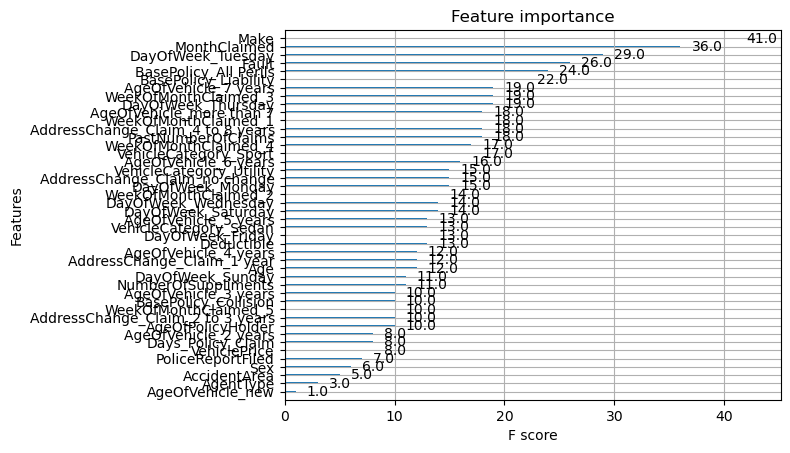

In [131]:
from xgboost import plot_importance
plot_importance(xgboost_model_1)

## Hyper Parameter Tuning for LR

In [132]:
num_eval = 100

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [133]:
load = True
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [134]:
LR_hyperopt1[1]

{'C': 0.38483951559484364,
 'fit_intercept': 1,
 'max_iter': 625,
 'solver': 1,
 'tol': 2.497446462286831e-05,
 'warm_start': 1}

In [135]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [136]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
97,-0.400341,[0.38483951559484364],[1],[625],[1],[2.497446462286831e-05],[1]
65,-0.399885,[2.6559538990039635],[1],[210],[0],[6.236074039057156e-05],[1]
79,-0.399885,[2.612077812216334],[1],[794],[1],[3.439277567033789e-05],[1]
51,-0.399885,[2.660035668728218],[1],[657],[2],[7.479801425650578e-05],[0]
54,-0.399885,[2.6859535146476747],[1],[554],[2],[5.9776994981940255e-05],[0]
...,...,...,...,...,...,...,...
58,-0.396736,[0.20182318875810634],[1],[92],[2],[4.6956840086325634e-05],[0]
7,-0.396011,[0.6231375564399231],[0],[89],[1],[8.73713316338657e-05],[0]
83,-0.394511,[0.796726984396104],[1],[551],[1],[1.8431451081218683e-05],[0]
99,-0.392539,[0.0929797854433157],[1],[210],[1],[3.331055191009184e-05],[1]


In [137]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [138]:
LR_model_1

LogisticRegression(C=0.38483951559484364, class_weight='balanced',
                   fit_intercept=False, max_iter=625, random_state=19,
                   solver='newton-cg', tol=2.497446462286831e-05)

### Model without tuning

In [139]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1418    3]
 [  89    0]]
TN: 1418, FP: 3, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [140]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[845 576]
 [  8  81]]
TN: 845, FP: 576, FN: 8, TP: 81


Precision:  0.1232876712328767
Recall:  0.9101123595505618
F2:  0.3998025666337612
G-Mean:  0.7356628437801288


(0.1232876712328767,
 0.9101123595505618,
 0.3998025666337612,
 0.7356628437801288)

### Model with tuning

In [141]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[860 561]
 [  9  80]]
TN: 860, FP: 561, FN: 9, TP: 80


Precision:  0.12480499219968799
Recall:  0.898876404494382
F2:  0.4012036108324975
G-Mean:  0.7375681878400807


(0.12480499219968799,
 0.898876404494382,
 0.4012036108324975,
 0.7375681878400807)

## Hyper Parameter Tuning for SVC

In [142]:
num_eval = 100

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.lognormal('C', 0, 1),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [143]:
load = True
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [144]:
SVC_hyperopt1[1]

{'C': 5.515706706142934,
 'fit_intercept': 1,
 'max_iter': 601,
 'tol': 7.414036053743112e-05}

In [145]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [146]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
39,-0.410017,[5.515706706142934],[1],[601],[7.414036053743112e-05]
72,-0.408602,[6.258250438898663],[1],[152],[8.290783714676018e-05]
22,-0.407880,[3.527686645913314],[1],[186],[6.18701944168837e-05]
91,-0.407549,[3.5353929441112677],[1],[527],[4.977774463316323e-05]
34,-0.407104,[4.903719847801875],[1],[601],[7.540272042432287e-05]
...,...,...,...,...,...
2,-0.339398,[7.081437358334119],[0],[705],[8.504587118151156e-05]
76,-0.334101,[6.818908160888204],[1],[334],[4.7490282882961475e-05]
40,-0.317737,[7.970914652542083],[1],[15],[4.968886635273788e-05]
30,-0.304878,[9.702629523492087],[1],[661],[6.099759089173338e-05]


In [147]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

In [148]:
SVC_model_1

LinearSVC(C=5.515706706142934, class_weight='balanced', fit_intercept=False,
          max_iter=601, random_state=19, tol=7.414036053743112e-05)

### Model Without Tuning

In [149]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


### Model without tuning but with imbalance handling

In [150]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[837 584]
 [  6  83]]
TN: 837, FP: 584, FN: 6, TP: 83


Precision:  0.12443778110944528
Recall:  0.9325842696629213
F2:  0.4056695992179863
G-Mean:  0.7411561776967913


(0.12443778110944528,
 0.9325842696629213,
 0.4056695992179863,
 0.7411561776967913)

### Model With Tuning

In [151]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[870 551]
 [ 10  79]]
TN: 870, FP: 551, FN: 10, TP: 79


Precision:  0.1253968253968254
Recall:  0.8876404494382022
F2:  0.4006085192697769
G-Mean:  0.7371928759766578


(0.1253968253968254,
 0.8876404494382022,
 0.4006085192697769,
 0.7371928759766578)

## Random Forest Tuning

In [152]:
num_eval = 100

RF_param_hyperopt = {
    'warm_start' : hp.choice('warm_start', [True, False]),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'bootstrap': True,
    'max_features': hp.choice('max_features', ["sqrt", "log2", None]),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'max_samples': scope.int(hp.quniform('max_samples', 1, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'class_weight':'balanced'
}

In [153]:
load = True
if(load == False):
    RF_hyperopt1 = hyperopt(RF_param_hyperopt,  num_eval, RandomForestClassifier)
    save_file('TuningFS/RF_hyperopt1.pkl', RF_hyperopt1)
else:
    try:
        RF_hyperopt1 = load_file('TuningFS/RF_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [154]:
RF_hyperopt1[1]

{'criterion': 0,
 'max_depth': 20.0,
 'max_features': 2,
 'max_samples': 20.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 7.0,
 'n_estimators': 420.0,
 'warm_start': 1}

In [155]:
trials = RF_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [156]:
bayesTrialsData.sort_values(by='loss')

,loss,criterion,max_depth,max_features,max_samples,min_samples_leaf,min_samples_split,n_estimators,warm_start
81,-0.357878,[0],[20.0],[2],[20.0],[1.0],[7.0],[420.0],[1]
72,-0.355058,[0],[15.0],[2],[15.0],[1.0],[6.0],[380.0],[1]
83,-0.349668,[1],[9.0],[2],[20.0],[2.0],[10.0],[400.0],[1]
75,-0.347698,[0],[10.0],[2],[16.0],[1.0],[6.0],[340.0],[1]
76,-0.344394,[0],[20.0],[2],[18.0],[1.0],[7.0],[340.0],[1]
...,...,...,...,...,...,...,...,...,...
60,-0.000000,[0],[9.0],[1],[6.0],[9.0],[5.0],[240.0],[1]
10,-0.000000,[0],[18.0],[0],[6.0],[17.0],[7.0],[180.0],[1]
13,-0.000000,[1],[13.0],[1],[7.0],[12.0],[19.0],[520.0],[1]
91,-0.000000,[1],[17.0],[2],[18.0],[10.0],[8.0],[360.0],[0]


In [157]:
rf_chosen = RF_hyperopt1[1]


rf_model_1   =   RandomForestClassifier(warm_start=[True, False][rf_chosen['warm_start']],
                                  criterion=["gini", "entropy"][rf_chosen['criterion']],
                                  bootstrap = True,
                                  max_features = ["sqrt", "log2", None][rf_chosen['max_features']],
                                  max_depth = int(rf_chosen['max_depth']),
                                  max_samples = int(rf_chosen['max_samples']),
                                  min_samples_split = int(rf_chosen['min_samples_split']),
                                  min_samples_leaf=int(rf_chosen['min_samples_leaf']),
                                  n_estimators = int(rf_chosen['n_estimators']),
                                  class_weight = 'balanced',
                                  random_state=19)

In [158]:
rf_model_1

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       max_samples=20, min_samples_split=7, n_estimators=420,
                       random_state=19)

### Model without tuning

In [159]:
train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  87    2]]
TN: 1421, FP: 0, FN: 87, TP: 2


Precision:  1.0
Recall:  0.02247191011235955
F2:  0.02793296089385475
G-Mean:  0.14990633779917228


### Model without tuning but with imbalance handling

In [160]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1279  142]
 [  63   26]]
TN: 1279, FP: 142, FN: 63, TP: 26


Precision:  0.15476190476190477
Recall:  0.29213483146067415
F2:  0.24809160305343508
G-Mean:  0.5127786137431211


(0.15476190476190477,
 0.29213483146067415,
 0.24809160305343508,
 0.5127786137431211)

### Model with tuning 

In [161]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,rf_model_1)

Confusion Matrix: 
 [[790 631]
 [ 13  76]]
TN: 790, FP: 631, FN: 13, TP: 76


Precision:  0.1074964639321075
Recall:  0.8539325842696629
F2:  0.35747883349012227
G-Mean:  0.689014401578597


(0.1074964639321075,
 0.8539325842696629,
 0.35747883349012227,
 0.689014401578597)

## AdaBoost

In [162]:
num_eval = 100

ADA_param_hyperopt = {
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
}

In [163]:
load = True
if(load == False):
    ADA_hyperopt1 = hyperopt(ADA_param_hyperopt,  num_eval, AdaBoostClassifier)
    save_file('TuningFS/ADA_hyperopt1.pkl', ADA_hyperopt1)
else:
    try:
        ADA_hyperopt1 = load_file('TuningFS/ADA_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [164]:
ADA_hyperopt1[1]

{'learning_rate': 0.2052718535140969, 'n_estimators': 60.0}

In [165]:
trials = ADA_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [166]:
bayesTrialsData.sort_values(by='loss')

,loss,learning_rate,n_estimators
51,-0.390149,[0.2052718535140969],[60.0]
26,-0.389538,[0.22222673465497988],[60.0]
90,-0.388216,[0.196414061791444],[60.0]
20,-0.387305,[0.1300363427565348],[60.0]
70,-0.386696,[0.07659150577538429],[120.0]
...,...,...,...
59,-0.297619,[0.4653623992219313],[300.0]
17,-0.295154,[0.40026932352184014],[420.0]
10,-0.293321,[0.4044873534565836],[440.0]
0,-0.283019,[0.4257717452698156],[520.0]


In [167]:
ada_chosen = ADA_hyperopt1[1]


ada_model_1   =   AdaBoostClassifier(learning_rate=ada_chosen['learning_rate'],
                                    n_estimators = int(ada_chosen['n_estimators']),
                                    random_state=19)

In [168]:
ada_model_1

AdaBoostClassifier(learning_rate=0.2052718535140969, n_estimators=60,
                   random_state=19)

## Model without tuning 

In [169]:
train_model(X_train, X_test, y_train, y_test, AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1414    7]
 [  86    3]]
TN: 1414, FP: 7, FN: 86, TP: 3


Precision:  0.3
Recall:  0.033707865168539325
F2:  0.040983606557377046
G-Mean:  0.18314425071961712


## Model without tuning but with imbalance handling

In [170]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1032  389]
 [  34   55]]
TN: 1032, FP: 389, FN: 34, TP: 55


Precision:  0.12387387387387387
Recall:  0.6179775280898876
F2:  0.34374999999999994
G-Mean:  0.6699295755255197


(0.12387387387387387,
 0.6179775280898876,
 0.34374999999999994,
 0.6699295755255197)

# Model with tuning 

In [171]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,ada_model_1)

Confusion Matrix: 
 [[854 567]
 [ 13  76]]
TN: 854, FP: 567, FN: 13, TP: 76


Precision:  0.1181959564541213
Recall:  0.8539325842696629
F2:  0.3803803803803804
G-Mean:  0.716380390192741


(0.1181959564541213, 0.8539325842696629, 0.3803803803803804, 0.716380390192741)

# Voting Classifier with tuned models

### Model Without Tuning

In [172]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [173]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1420    1]
 [  89    0]]
TN: 1420, FP: 1, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [174]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
                ('RF',RandomForestClassifier(random_state=19)),
                ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [175]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc2)

Confusion Matrix: 
 [[1026  395]
 [  31   58]]
TN: 1026, FP: 395, FN: 31, TP: 58


Precision:  0.1280353200883002
Recall:  0.651685393258427
F2:  0.3584672435105068
G-Mean:  0.6859550139245151


(0.1280353200883002, 0.651685393258427, 0.3584672435105068, 0.6859550139245151)

### Model with Tuning

In [176]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),
                ('LR',LR_model_1),
                ('LinearSVC', SVC_model_1),
                ('RF',rf_model_1),
                ('Ada',ada_model_1)],                
    voting='hard'
)

In [177]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc3)

Confusion Matrix: 
 [[827 594]
 [  8  81]]
TN: 827, FP: 594, FN: 8, TP: 81


Precision:  0.12
Recall:  0.9101123595505618
F2:  0.39282250242483024
G-Mean:  0.7277852037853748


(0.12, 0.9101123595505618, 0.39282250242483024, 0.7277852037853748)

In [178]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=0.19151572699658645,
                                            colsample_bynode=0.6329283822987078,
                                            colsample_bytree=0.3865791309646543,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=16.60120812043403,
                                            gpu_id=None, grow_policy=None,
                                            imp...
                              LinearSVC(C=5.515706706142934,
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=601,
                                        random_state=19,
                                        tol=7.414036053743112e-05)),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features=None,
                                                     max_samples=20,
                                                     min_samples_split=7,
                                                     n_estimators=420,
                                                     random_state=19)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.2052718535140969,
                                                 n_estimators=60,
                                                 random_state=19))])